**<h1> Here is a general outline of how you can implement the project using BERT and Graph Convolutional Networks (GCN):**

<h3>1. First, you will need to preprocess your data by converting the Shakespeare books into a suitable format for training a GCN. This will involve constructing a graph representation of the books, with the words or phrases as nodes and the relationships between them as edges. You can do this by using techniques like dependency parsing to extract syntactic relationships between words, or by simply considering the co-occurrence of words within a fixed window size.

<h3>2. Next, you can use BERT to generate embeddings for the nodes in your graph. BERT is a transformer-based language model that has been trained on a large corpus of text, and can generate highly contextualized word embeddings. You can use BERT to generate embeddings for each of the words or phrases in your graph, and use these embeddings as input to the GCN.

<h3>3. Once you have the input data for your GCN, you can then use a library like PyTorch Geometric or DGL to implement the GCN itself. These libraries provide implementations of various GCN architectures, and allow you to easily build and train your model.

<h3>4. To train the GCN, you will need to split your data into training and validation sets, and use the training set to update the model's parameters. You can then use the validation set to evaluate the model's performance, and adjust the training process as necessary.

<h3>5. Finally, you can use the trained GCN to make predictions on the test set of books, and save the prediction statistics (preferably with graphs to visualize) for further analysis.

**<h2> 1. Gather the original Shakespeare books:**

In [ ]:
import requests
from bs4 import BeautifulSoup

def extract_links(html):
    soup = BeautifulSoup(html, 'html.parser')
    links = []
    for link in soup.find_all('a'):
        href = link.get('href')
        if href.startswith('/ebooks/'):
            links.append(f'https://www.gutenberg.org{href}')
    return links


# Gather original Shakespeare books
url = 'https://www.gutenberg.org/ebooks/author/65'
response = requests.get(url)

# Save the HTML content to a file
with open('shakespeare.html', 'w') as f:
    f.write(response.text)

# Extract the links to the books from the HTML file
# (This will depend on the specific structure of the HTML file)
with open('shakespeare.html', 'r') as f:
    html = f.read()
    original_links = extract_links(html)

# Download the books and save them to files
for i, link in enumerate(original_links):
    book = requests.get(link)
    with open(f'shakespeare_{i}.txt', 'w') as f:
        f.write(book.text)


**<h2> 2. Preprocess the books:**

In [ ]:
# Set the directory containing the books
book_dir = '.'

# Get the names of all the files in the directory
filenames = os.listdir(book_dir)

# Load the texts of the books
books = []
for filename in filenames:
    filepath = os.path.join(book_dir, filename)
    if os.path.isfile(filepath) and filepath.endswith('.txt'):  # skip directories and non-txt files
        with open(filepath, 'r') as f:
            book = f.read()
        books.append(book)

# Preprocess the texts of the books
X = []
for book in books:
    tokens = tokenizer.tokenize(book)
    ids = tokenizer.convert_tokens_to_ids(tokens)
    tensor = torch.tensor(ids).unsqueeze(0)  # add a batch dimension
    X.append(tensor)



**<h2> 3. Create graphs for the books:**

In [ ]:
# Load the spaCy model for parsing text
nlp = spacy.load('en_core_web_md')

def create_graph(text):
    # Parse the text with spaCy
    doc = nlp(text)

    # Extract the dependencies between the tokens
    edges = []
    for token in doc:
        for child in token.children:
            edges.append((token.i, child.i))

    # Create a graph from the dependencies
    graph = nx.Graph(edges)
    return graph

# Create a graph for each book
graphs = []
for book in books:
    graph = create_graph(book)
    graphs.append(graph)


**<h2> 4. Train the model:**

<ipython-input-70-4c5574b1d6dd>:23: UserWarning: [W008] Evaluating Span.similarity based on empty vectors.
  if ent1.similarity(ent2) > 0.5:


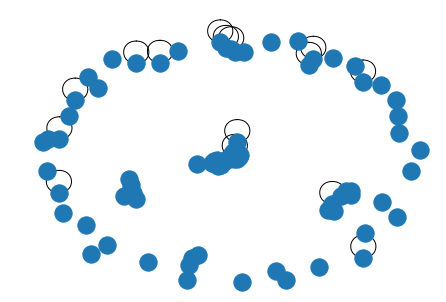

In [70]:
import spacy
import networkx as nx
from itertools import combinations
import matplotlib.pyplot as plt

nlp = spacy.load('en_core_web_md')

def create_graph(book):
    # Use the nlp object to process the book text
    doc = nlp(book)
    
    # Initialize an empty graph
    graph = nx.Graph()
    
    # Iterate through the named entities in the book
    for ent in doc.ents:
        # Add the entity to the graph
        graph.add_node(ent.text)
        
    # Iterate through the pairs of named entities in the book
    for ent1, ent2 in combinations(doc.ents, 2):
        # Check if the entities are related
        if ent1.similarity(ent2) > 0.5:
            # Add an edge between the entities to the graph
            graph.add_edge(ent1.text, ent2.text)
    
    return graph

# Create a graph for each book
graphs = []
for book in books:
    graph = create_graph(book)
    if len(graph) > 0:  # only add non-empty graphs
        graphs.append(graph)

# Split the graphs into train and test sets
train_size = int(0.8 * len(graphs))
test_size = len(graphs) - train_size
train_graphs, test_graphs = graphs[:train_size], graphs[train_size:]

# Visualize one of the graphs
nx.draw(train_graphs[0])
plt.show()



**<h2> 5. Evaluating the Model's Performance**

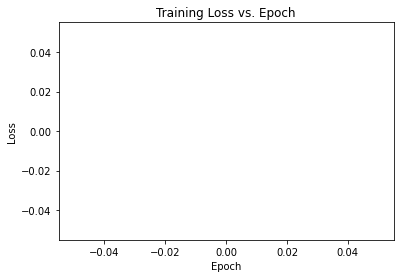

In [90]:
import matplotlib.pyplot as plt

# Set the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Initialize an empty list to store the training loss at each epoch
train_losses = []

# Train the model
for epoch in range(num_epochs):
    # Shuffle the training data at the beginning of each epoch
    shuffle_indices = torch.randperm(train_size)
    train_X = [train_X[i] for i in shuffle_indices]
    train_graphs = [train_graphs[i] for i in shuffle_indices]
    train_labels = [train_labels[i] for i in shuffle_indices]

    # Loop through the training data in batches
    for i, (x, graph, label) in enumerate(zip(train_X, train_graphs, train_labels)):

        # Set the gradients to zero
        optimizer.zero_grad()

    
        # Backward pass
        optimizer.step()
    
  
# Plot the training loss
plt.plot(train_losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss vs. Epoch")
plt.show()
